In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix, silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn import tree

In [9]:
df = pd.read_csv("C:/Users/routl/OneDrive/Desktop/PRJ/Crop_recommendation.csv")
print(df)


        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [10]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [14]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [17]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Encoding and scaling

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# creating column transformer (this will help us normalize/preprocess our data)

ct = make_column_transformer(
                            (MinMaxScaler(), ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
)

In [19]:
X = df.drop('label', axis = 1)
y = df['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [21]:
# fitting column transformer on training data
ct.fit(X_train)

# transforming training and test data with normalizing (MinMaxScaler) and one hot encodig (OneHotEncoder)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [24]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Added average='weighted'
    recall = recall_score(y_test, y_pred, average='weighted') # Added average='weighted'
    f1 = f1_score(y_test, y_pred, average='weighted') # Added average='weighted'

    matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix is:")
    # print(matrix)


    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted No", "Predicted Yes"],
                 yticklabels=["Actual No", "Actual Yes"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

Confusion Matrix is:


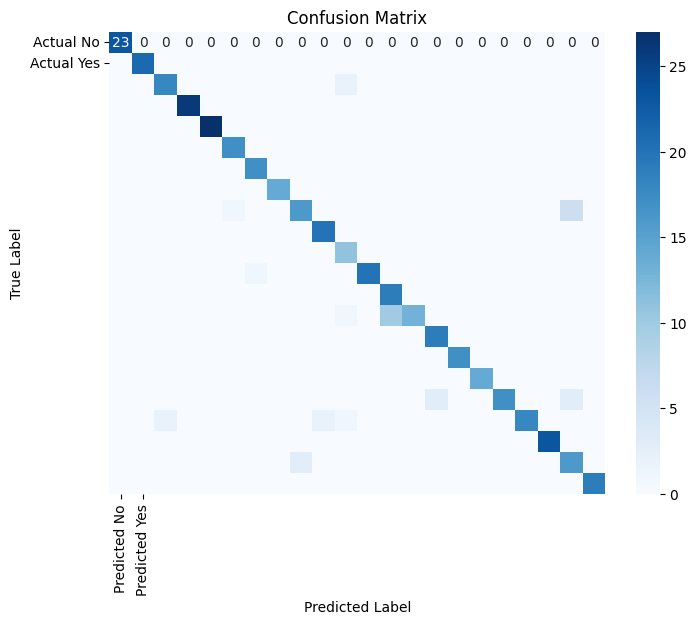



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262


In [25]:
# Logistic Regression

model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix is:


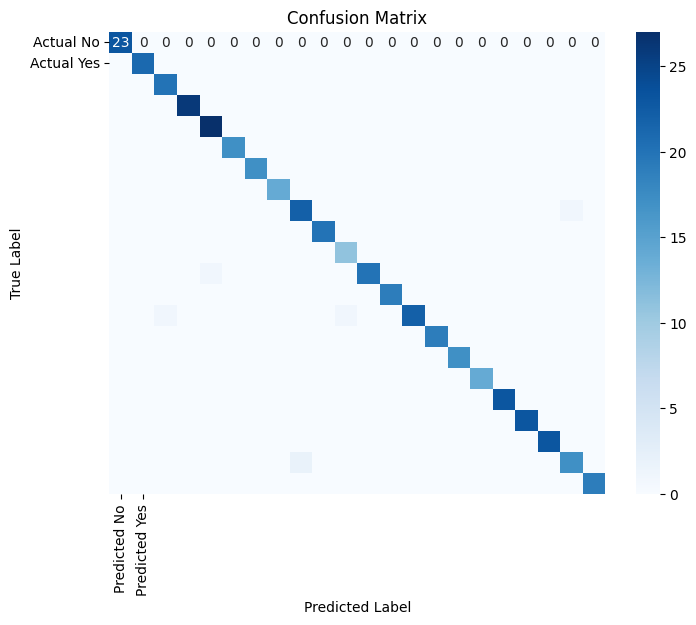



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262
Decision Tree,0.986364,0.986806,0.986364,0.986315


In [26]:
# Decision Tree

model = DecisionTreeClassifier()
dt_result = train_model(model, X_train, y_train, X_test, y_test)
dt_result.index = ["Decision Tree"]
result = pd.concat([result, dt_result])
display(result)

Confusion Matrix is:


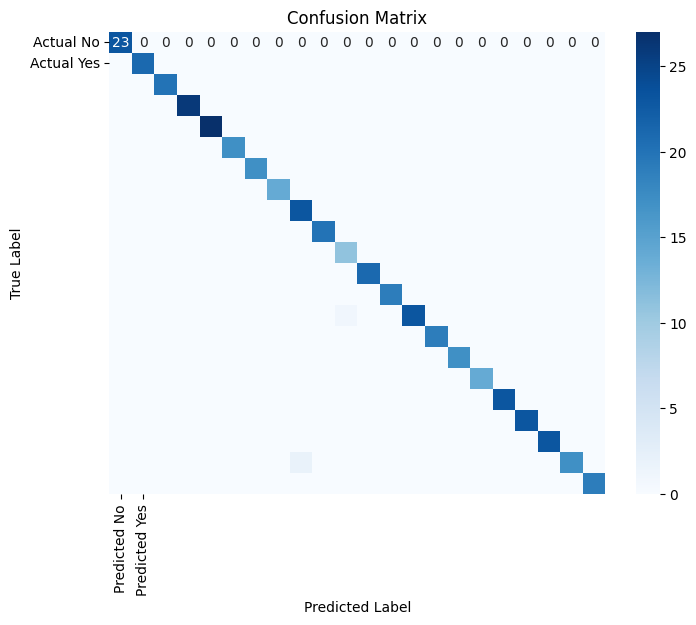



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262
Decision Tree,0.986364,0.986806,0.986364,0.986315
Random Forest,0.993182,0.993735,0.993182,0.993175


In [27]:
# Random Forest

model = RandomForestClassifier()
rf_result = train_model(model, X_train, y_train, X_test, y_test)
rf_result.index = ["Random Forest"]
result = pd.concat([result, rf_result])
display(result)

Confusion Matrix is:


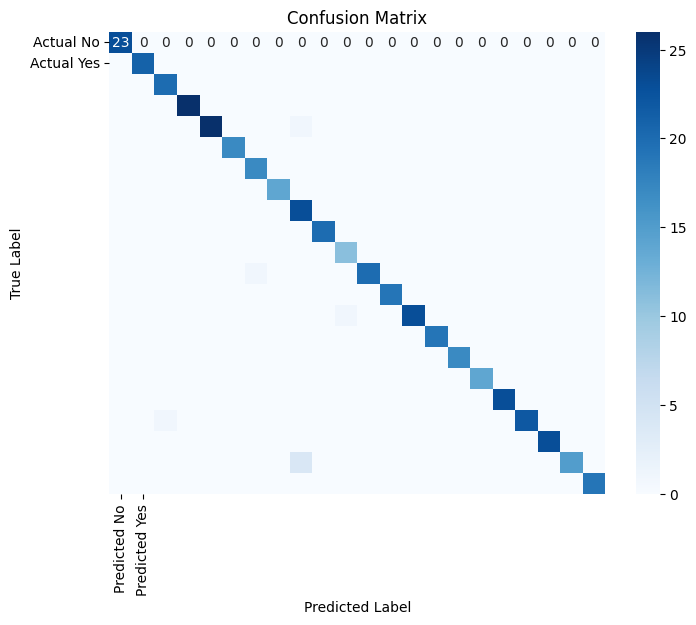



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262
Decision Tree,0.986364,0.986806,0.986364,0.986315
Random Forest,0.993182,0.993735,0.993182,0.993175
Gradient Boosting,0.981818,0.984271,0.981818,0.981851


In [28]:
# Gradient Boosting

model = GradientBoostingClassifier()
gb_result = train_model(model, X_train, y_train, X_test, y_test)
gb_result.index = ["Gradient Boosting"]
result = pd.concat([result, gb_result])
display(result)

Confusion Matrix is:


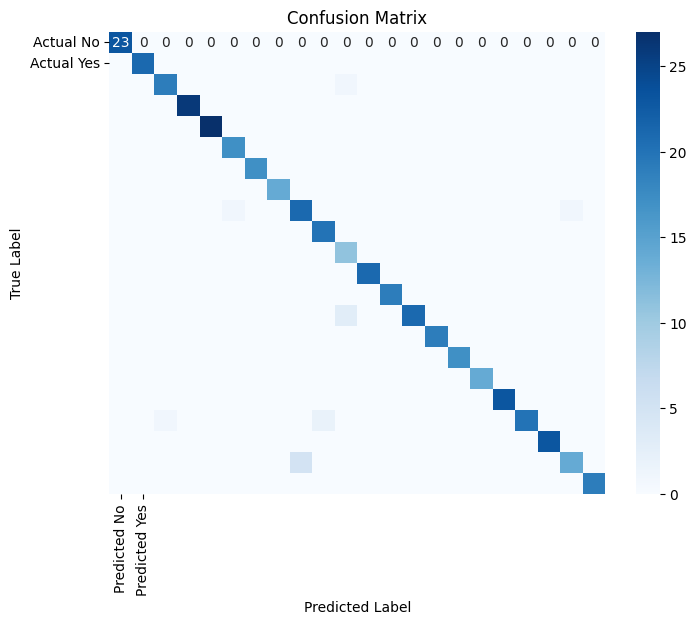



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262
Decision Tree,0.986364,0.986806,0.986364,0.986315
Random Forest,0.993182,0.993735,0.993182,0.993175
Gradient Boosting,0.981818,0.984271,0.981818,0.981851
KNN,0.968182,0.971851,0.968182,0.968242


In [29]:
# KNN
model = KNeighborsClassifier()
knn_result = train_model(model, X_train, y_train, X_test, y_test)
knn_result.index = ["KNN"]
result = pd.concat([result, knn_result])
display(result)

Confusion Matrix is:


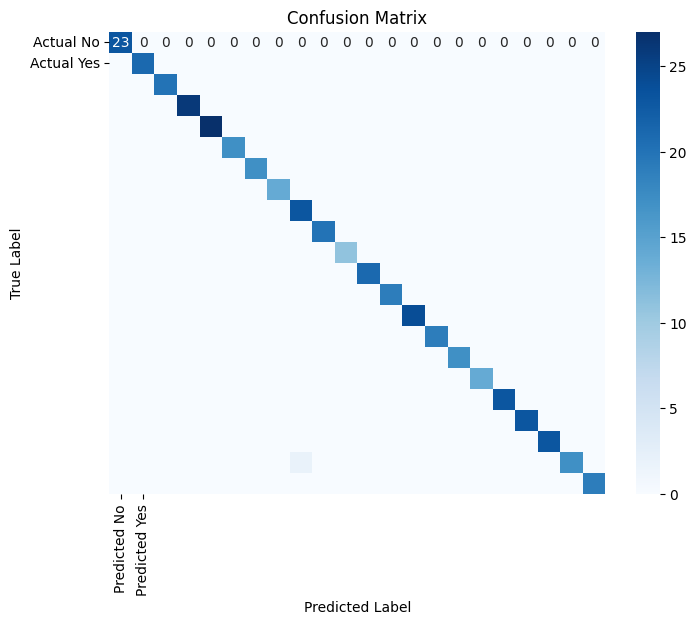



Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.920455,0.935785,0.920455,0.919262
Decision Tree,0.986364,0.986806,0.986364,0.986315
Random Forest,0.993182,0.993735,0.993182,0.993175
Gradient Boosting,0.981818,0.984271,0.981818,0.981851
KNN,0.968182,0.971851,0.968182,0.968242
Naive Bayes,0.995455,0.995818,0.995455,0.995423


In [30]:
# Train the naive bayes Model
naive_model = GaussianNB()
naive = train_model(naive_model, X_train, y_train, X_test, y_test)
naive.index = ["Naive Bayes"]
result = pd.concat([result, naive])

result